In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import string
import re
import nltk
from nltk.corpus import stopwords
import json

In [2]:
def readTextFile(path):
    with open(path) as f:
        captions = f.read()
    return captions

In [3]:
captions = readTextFile(r"C:\Users\MANISH\ML\data\Flickr_Data\Flickr_TextData\Flickr8k.token.txt")
captions=captions.split('\n')[:-1]

In [143]:
captions[:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

In [5]:
print(len(captions))

40460


In [6]:
first,second = captions[0].split('\t')
print(first)
print(second)
print(first.split("."))
print(first.split(".")[0])

1000268201_693b08cb0e.jpg#0
A child in a pink dress is climbing up a set of stairs in an entry way .
['1000268201_693b08cb0e', 'jpg#0']
1000268201_693b08cb0e


In [7]:
#Dictionart to Map each image with the list of caption it has..

descriptions = {}

for x in captions:
    first,second = x.split('\t')
    img_name = first.split(".")[0]
    
    
    #if the image id is already present or not..
    if descriptions.get(img_name) is None:
        descriptions[img_name] = []
        
    descriptions[img_name].append(second)

In [8]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [9]:
IMG_PATH = "Flickr_Data/Images/"
import cv2

In [140]:
img = cv2.imread(IMG_PATH + "1000268201_693b08cb0e.jpg")
#print(img)

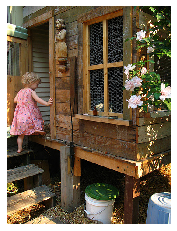

In [11]:

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

# data cleaning

In [12]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]+"," ",sentence)
    sentence = sentence.split()
    
    sentence = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence

In [13]:
clean_text("A cat is playing in house # 64")

'cat is playing in house'

In [14]:
#clean all captions..

for keys ,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i] = clean_text(caption_list[i])

In [15]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [16]:
with open("descriptions_1.txt","w") as f:
    f.write(str(descriptions))

# creating Vocab.

In [17]:
descriptions = None
with open("descriptions_1.txt","r") as f:
    descriptions = f.read()
    
json_acceptable_string = descriptions.replace("'","\"")
descriptions = json.loads(json_acceptable_string)


In [18]:
print(type(descriptions))

<class 'dict'>


In [19]:
# vocab: 

vocab = set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
    
print("voacb size : %d"% len(vocab))

voacb size : 8424


In [20]:
total_words = []

for key in descriptions.keys():
    [total_words.append(i) for des in descriptions[key] for i in des.split()]
    
print("total no. of words : %d"%len(total_words))

total no. of words : 373837


In [21]:
# Filter words from vocab according to certain threshold frequency : 

import collections

counter = collections.Counter(total_words)
freq_cnt = dict(counter)
print(freq_cnt)


{'child': 1545, 'in': 18987, 'pink': 739, 'dress': 348, 'is': 9345, 'climbing': 507, 'up': 1302, 'set': 109, 'of': 6723, 'stairs': 109, 'an': 2432, 'entry': 1, 'way': 53, 'girl': 3328, 'going': 149, 'into': 1074, 'wooden': 284, 'building': 511, 'little': 1768, 'playhouse': 6, 'the': 18420, 'to': 3176, 'her': 1178, 'cabin': 4, 'black': 3848, 'dog': 8138, 'and': 8863, 'spotted': 38, 'are': 3505, 'fighting': 133, 'tri': 14, 'colored': 221, 'playing': 2008, 'with': 7765, 'each': 430, 'other': 773, 'on': 10746, 'road': 398, 'white': 3959, 'brown': 2578, 'spots': 29, 'staring': 57, 'at': 2916, 'street': 944, 'two': 5643, 'dogs': 2125, 'different': 46, 'breeds': 5, 'looking': 744, 'pavement': 48, 'moving': 41, 'toward': 146, 'covered': 372, 'paint': 62, 'sits': 577, 'front': 1386, 'painted': 64, 'rainbow': 22, 'hands': 246, 'bowl': 30, 'sitting': 1368, 'large': 1237, 'small': 1278, 'grass': 1622, 'plays': 526, 'fingerpaints': 3, 'canvas': 6, 'it': 401, 'there': 304, 'pigtails': 14, 'painting'

In [22]:
print(len(freq_cnt))

8424


In [23]:
# sort this dictionary acording to the frequency count

sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])

#Filter : 

threshold = 10
sorted_freq_cnt = [x for x in sorted_freq_cnt if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_cnt]

print(len(total_words)) # final vocab ize

1845


# Prepare Train/Test Data

In [24]:
train_file_data = readTextFile("C:/Users/MANISH/ML/data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test_file_data = readTextFile("C:/Users/MANISH/ML/data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")

#print(train_file_data)



In [25]:
train = [x.split(".")[0] for x in train_file_data.split("\n")[:-1]]
test = [x.split(".")[0] for x in test_file_data.split("\n")[:-1]]

train[:5]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [26]:
# prepare Descriptions for training data
#Tweak - add <s> and <e> token to our training data

train_descriptions = {}

for img_id in train:
    train_descriptions[img_id] = []
    for cap in descriptions[img_id]:
        cap_to_append = "startseq " + cap + " endseq"
        train_descriptions[img_id].append(cap_to_append)
        

In [27]:
train_descriptions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

# Transfer Learning
- Images -->Features
- Text -->Features

In [28]:
import keras
from time import time
import pickle
import string
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense , Dropout, Embedding, LSTM
from keras.layers.merge import add

Using TensorFlow backend.


# Image Feature Extraction

In [29]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [30]:
model_new = Model(model.input,model.layers[-2].output)

In [145]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #Normalisation
    img = preprocess_input(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


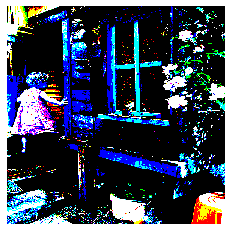

In [146]:
img = preprocess_img(IMG_PATH + "1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.axis("off")
plt.show()

In [33]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img) #a feature vector is just a collection of the measured values of a particular feature
    feature_vector = feature_vector.reshape(feature_vector.shape[1],)
    #print(feature_vector.shape)
    return feature_vector

In [149]:
print(encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg"))
print((encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")).shape)

[0.04154297 0.17076068 0.2927861  ... 0.05089626 0.3132238  0.86007506]
(2048,)


In [35]:
start = time()
encoding_train = {}
# image_id -->feature_vector extracted from ResNet img

for ix,img_id in enumerate(train):
    img_path = IMG_PATH + "/" + img_id + ".jpg"
    encoding_train[img_path] = encode_image(img_path) # changes made...
    
    if ix%100==0:
        print("Encoding in progress Time step %d "%ix)
        
end_t = time()

print("Total time taken is: ",end_t-start)

Encoding in progress Time step 0 
Encoding in progress Time step 100 
Encoding in progress Time step 200 
Encoding in progress Time step 300 
Encoding in progress Time step 400 
Encoding in progress Time step 500 
Encoding in progress Time step 600 
Encoding in progress Time step 700 
Encoding in progress Time step 800 
Encoding in progress Time step 900 
Encoding in progress Time step 1000 
Encoding in progress Time step 1100 
Encoding in progress Time step 1200 
Encoding in progress Time step 1300 
Encoding in progress Time step 1400 
Encoding in progress Time step 1500 
Encoding in progress Time step 1600 
Encoding in progress Time step 1700 
Encoding in progress Time step 1800 
Encoding in progress Time step 1900 
Encoding in progress Time step 2000 
Encoding in progress Time step 2100 
Encoding in progress Time step 2200 
Encoding in progress Time step 2300 
Encoding in progress Time step 2400 
Encoding in progress Time step 2500 
Encoding in progress Time step 2600 
Encoding in p

In [36]:
# store everything to the disk

with open("encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [37]:
start = time()
encoding_test = {}
# image_id -->feature_vector extracted from ResNet img

for ix,img_id in enumerate(test):
    img_path = IMG_PATH+"/"+img_id+".jpg"
    encoding_test[img_path] = encode_image(img_path) # changes made...
    
    if ix%100==0:
        print("Encoding(Test) in progress Time step %d "%ix)
        
end_t = time()

print("Total time taken is: ",end_t-start)

Encoding(Test) in progress Time step 0 
Encoding(Test) in progress Time step 100 
Encoding(Test) in progress Time step 200 
Encoding(Test) in progress Time step 300 
Encoding(Test) in progress Time step 400 
Encoding(Test) in progress Time step 500 
Encoding(Test) in progress Time step 600 
Encoding(Test) in progress Time step 700 
Encoding(Test) in progress Time step 800 
Encoding(Test) in progress Time step 900 
Total time taken is:  47.83212685585022


In [38]:
print(encoding_train[list(encoding_train.keys())[0]].shape)

(2048,)


In [39]:
# store everything to the disk

with open("encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_test,f)

# Data pre-processing for captions..

In [40]:
# vocab..
len(total_words)

1845

In [41]:
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word
    
print(len(idx_to_word))

1845


In [42]:
# Two special words : startseq & endseq

idx_to_word[1846] = "startseq"
word_to_idx["startseq"] = 1846

idx_to_word[1847] = "endseq"
word_to_idx["endseq"] = 1847

vocab_size = len(word_to_idx) + 1
print("Vocab Size ",vocab_size)


Vocab Size  1848


In [43]:
max_len = 0

for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len = max(max_len,len(cap.split()))
        
print(max_len)

35


In [44]:
#print(train_descriptions)
print(type(train_descriptions))

<class 'dict'>


In [45]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2,y = [],[],[]
    
    n=0
    while True:
        for key,desc_list in train_descriptions.items():
            n += 1
            
            photo = encoding_train["Flickr_Data/Images//"+key+".jpg"]
            #print(photo)
            
            for desc in desc_list:
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi = to_categorical([yi],num_classes=vocab_size)[0]
                    
                    
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                    
                if n == batch_size:
                    #print("X1 ",np.array(X1).shape)
                    #print("X2 ",np.array(X2).shape)
                    #print("y ",np.array(y).shape)
                    yield [[np.array(X1),np.array(X2)],np.array(y)]
                    X1,X2,y = [],[],[]
                    n=0
    

  


In [46]:
print(len(encoding_train.keys())) # 6000 * 2048
print(encoding_train['Flickr_Data/Images//2513260012_03d33305cf.jpg'].shape)

for i in encoding_train.keys():
    #print(len(encoding_train[i]))
    pass

6000
(2048,)


# Word Embedding...

In [47]:
f = open("C:/Users/MANISH/ML/data/glove.6B.50d.txt",encoding='utf8')

In [48]:
start = time()
embedding_index = {}

for line in f:
    values = line.split()
    #print(values)
    
    word = values[0]
    
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word] = word_embedding
end = time();
print("The time taken to execute is : ",end-start)

The time taken to execute is :  7.857554912567139


In [49]:
f.close()

In [50]:
embedding_index['dog']

array([ 0.11008  , -0.38781  , -0.57615  , -0.27714  ,  0.70521  ,
        0.53994  , -1.0786   , -0.40146  ,  1.1504   , -0.5678   ,
        0.0038977,  0.52878  ,  0.64561  ,  0.47262  ,  0.48549  ,
       -0.18407  ,  0.1801   ,  0.91397  , -1.1979   , -0.5778   ,
       -0.37985  ,  0.33606  ,  0.772    ,  0.75555  ,  0.45506  ,
       -1.7671   , -1.0503   ,  0.42566  ,  0.41893  , -0.68327  ,
        1.5673   ,  0.27685  , -0.61708  ,  0.64638  , -0.076996 ,
        0.37118  ,  0.1308   , -0.45137  ,  0.25398  , -0.74392  ,
       -0.086199 ,  0.24068  , -0.64819  ,  0.83549  ,  1.2502   ,
       -0.51379  ,  0.04224  , -0.88118  ,  0.7158   ,  0.38519  ])

In [51]:
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    
    for word,idx in word_to_idx.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx] = embedding_vector
            
    return matrix

In [150]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(1848, 50)

# Model Architecture

In [101]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [102]:
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)


In [103]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

#  combined model..
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [104]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_5[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_4[0][0]                    
____________________________________________________________________________________________

In [105]:
# important thing - Embedding layer

model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [106]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

# Training of Model

In [132]:
epochs = 30
batch_size = 3
steps = len(train_descriptions)//batch_size
#print(steps)

In [133]:
#print(encoding_train)

In [134]:
for i in range(epochs):
    generator = data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size) 
    model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1) 
    model.save('C:/Users/MANISH/ML/CAPSTONE_PROJECT/model_weights/new/model_' + str(i) + '.h5')

Epoch 1/1
2000/2000 [==============================] - 199s 100ms/step - loss: 2.7117
Epoch 1/1
2000/2000 [==============================] - 200s 100ms/step - loss: 2.6789
Epoch 1/1
2000/2000 [==============================] - 197s 99ms/step - loss: 2.6541
Epoch 1/1
2000/2000 [==============================] - 198s 99ms/step - loss: 2.6322
Epoch 1/1
2000/2000 [==============================] - 197s 99ms/step - loss: 2.6096
Epoch 1/1
2000/2000 [==============================] - 198s 99ms/step - loss: 2.5889
Epoch 1/1
2000/2000 [==============================] - 193s 96ms/step - loss: 2.5706
Epoch 1/1
2000/2000 [==============================] - 196s 98ms/step - loss: 2.5592
Epoch 1/1
2000/2000 [==============================] - 197s 99ms/step - loss: 2.5418
Epoch 1/1
2000/2000 [==============================] - 197s 98ms/step - loss: 2.5283
Epoch 1/1
2000/2000 [==============================] - 198s 99ms/step - loss: 2.5169
Epoch 1/1
2000/2000 [==============================] - 196s 98m

In [130]:
#print(encoding_train[:10])

In [135]:
model = load_model('C:/Users/MANISH/ML/CAPSTONE_PROJECT/model_weights/new/model_9.h5')

In [136]:
def predict_caption(photo):
    in_text = "startseq"
    
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        ypred =  model.predict([photo,sequence])
        ypred = ypred.argmax()    #word with max probability - greedy sampling
        word = idx_to_word[ypred]
        in_text+= ' ' +word
        
        if word =='endseq':
            break
        
        
    final_caption =  in_text.split()
    final_caption = final_caption[1:-1]
    final_caption = ' '.join(final_caption)
    
    return final_caption

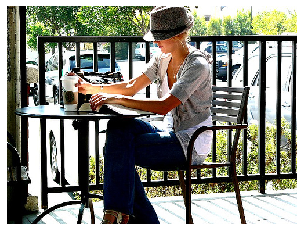

man in hoodie shirt and jeans is sitting on bench reading book


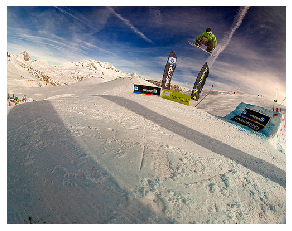

skier is making jump on dirt covered trail


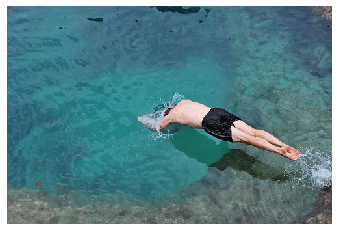

boy in swimming trunks is diving in swimming pool


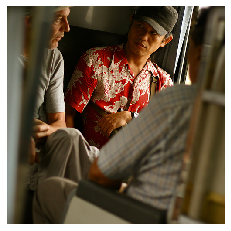

man in black shirt and cast hat is holding camera


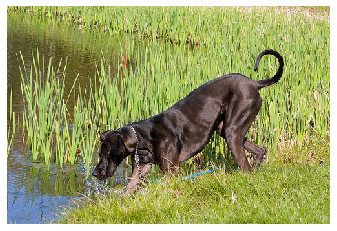

black dog running through the woods


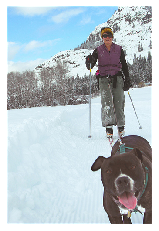

dog jumps in the air in the snow


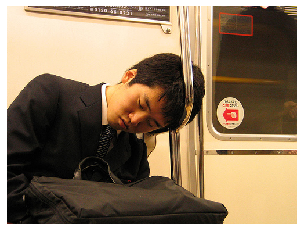

man in black shirt and tie is sitting in chair reading book


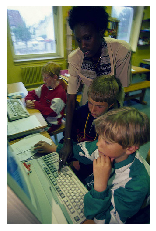

little girl in striped shirt and glasses is sitting on chair with her hand


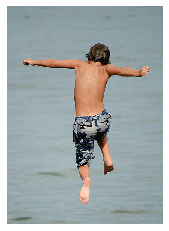

boy in swim trunks is jumping into the air


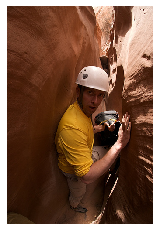

man in red shirt and helmet is holding his hand on his head


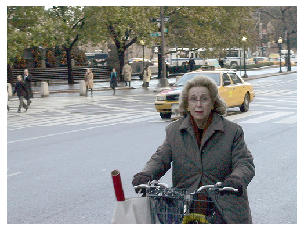

man and woman are riding tricycles on the street


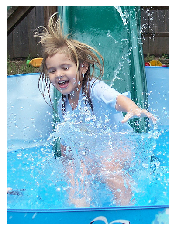

little girl in bathing suit is swimming in pool


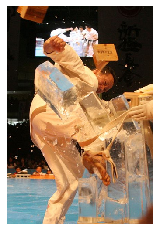

wrestler in blue shorts is jumping into swimming pool


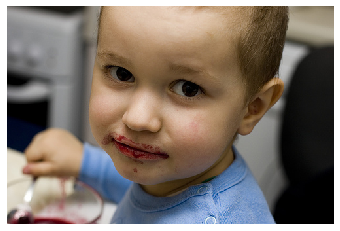

little girl with black hair and black hair is holding camera


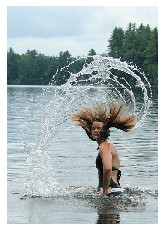

young girl jumping into lake


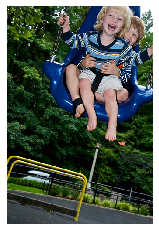

little girl in blue dress and blue shirt is hanging on playground gym


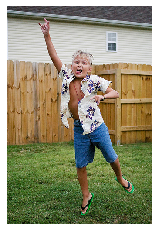

two men are playing soccer on field


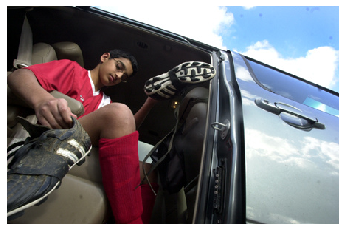

man and woman are riding on ride ride


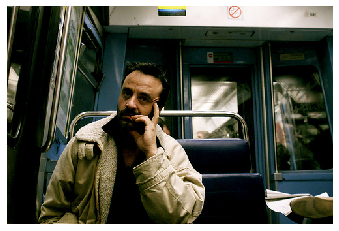

man with black and black shirt and black shirt is wearing black hat


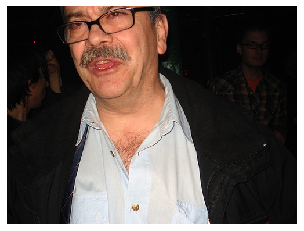

man in sunglasses and sunglasses looks at the camera


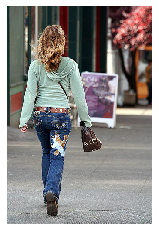

man in black shirt and leather stands on the sidewalk


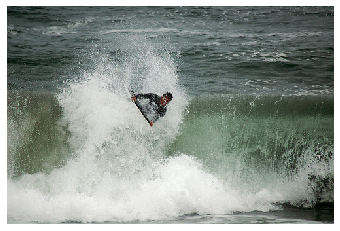

surfer rides wave


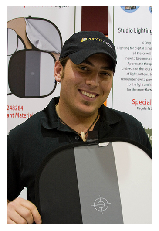

man wearing obama shirt and obama shirt


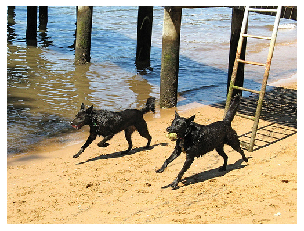

black dog is running on beach


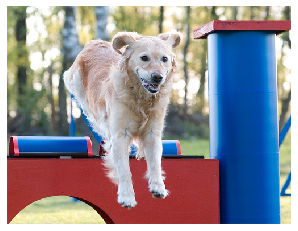

dog jumps over an obstacle


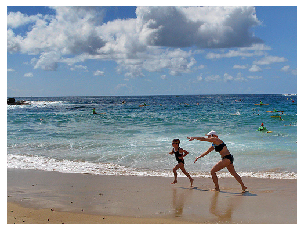

young boy is running on beach


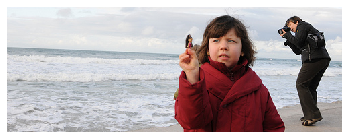

woman in red shirt and red shorts is talking to the girl in the blue shirt


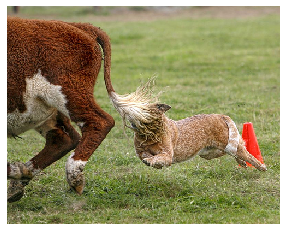

brown dog is running on the grass


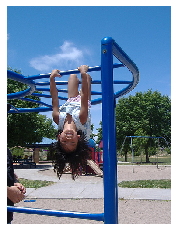

boy in blue shirt jumping into pool


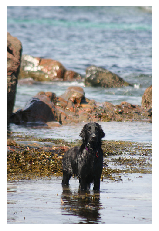

black dog is running on the shoreline


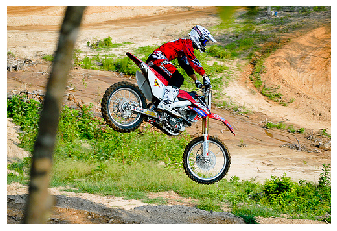

man on bike riding on dirt trail


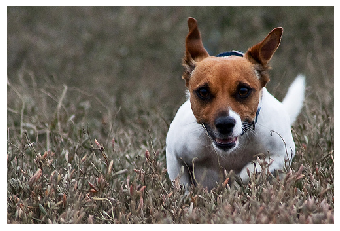

dog is running through the grass


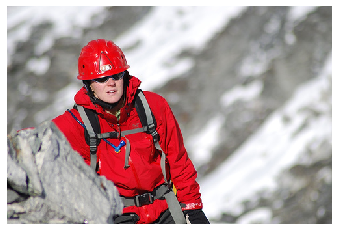

man in red coat and helmet is standing in patch of snow


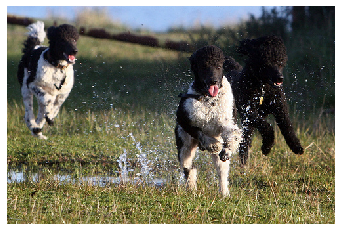

black and white dog running on field with stick in its mouth


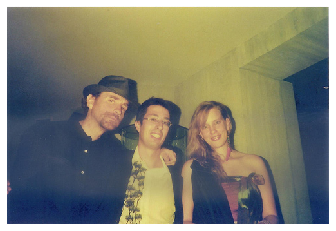

two girls are posing for picture


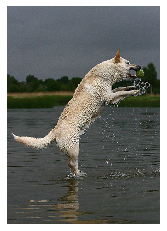

dog jumping into the air to catch ball


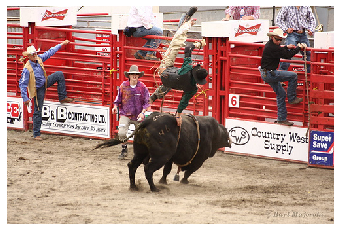

dogs racing around track


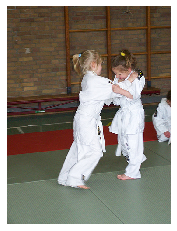

the girl is wearing white shirt and white shirt


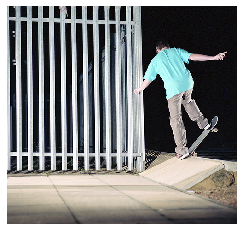

boy in red shirt is jumping on his skateboard


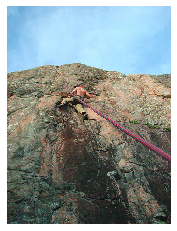

person climbs natural


In [138]:
# Pick some random images and predict captions..

for i in range(40):
    rn =  np.random.randint(0, 1000)
    img_name = list(encoding_test.keys())[rn]
    photo = encoding_test[img_name].reshape((1,2048))

    i = plt.imread(img_name)
    plt.imshow(i)
    plt.axis("off")
    plt.show()

    caption = predict_caption(photo)
    print(caption)